### Import Libraries
This cell imports essential libraries for data manipulation, numerical operations, and plotting: `numpy`, `pandas`, `matplotlib.pyplot`, and `seaborn`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset
This cell loads the **original 1990 California Housing dataset** from **OpenML** using `fetch_openml`.  
Unlike the simplified version available in `sklearn.datasets`, this dataset includes the categorical
feature `ocean_proximity` and reflects the original census data.


In [2]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml(name="california_housing", as_frame=True,version = 1)

In [3]:
dataset

{'data':        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0        -122.23     37.88                  41          880           129.0   
 1        -122.22     37.86                  21         7099          1106.0   
 2        -122.24     37.85                  52         1467           190.0   
 3        -122.25     37.85                  52         1274           235.0   
 4        -122.25     37.85                  52         1627           280.0   
 ...          ...       ...                 ...          ...             ...   
 20635    -121.09     39.48                  25         1665           374.0   
 20636    -121.21     39.49                  18          697           150.0   
 20637    -121.22     39.43                  17         2254           485.0   
 20638    -121.32     39.43                  18         1860           409.0   
 20639    -121.24     39.37                  16         2785           616.0   
 
        population  households

### Dataset Description
This cell prints the detailed description of the California Housing dataset, providing information about its features, target variable, and source.

In [4]:
dataset.DESCR

'Median house prices for California districts derived from the 1990 census.\n\nDownloaded from openml.org.'

### Separate Features and Target
This cell separates the dataset into input features (`X`) and the target variable (`y`),  
where the target represents **median house value (in USD)** for each district.


In [5]:
X,y = dataset.data,dataset.target

In [6]:
feature_names = dataset.feature_names
feature_names

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity']

In [7]:
target_name = dataset.target_names
target_name

['median_house_value']

In [8]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND


In [9]:
y

,median_house_value
0,452600
1,358500
2,352100
3,341300
4,342200
...,...
20635,78100
20636,77100
20637,92300
20638,84700


In [10]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY


In [11]:
X.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,INLAND


In [12]:
X.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  int64   
 3   total_rooms         20640 non-null  int64   
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  int64   
 6   households          20640 non-null  int64   
 7   median_income       20640 non-null  float64 
 8   ocean_proximity     20640 non-null  category
dtypes: category(1), float64(4), int64(4)
memory usage: 1.3 MB


### Split Data into Training and Test Sets
This cell splits the dataset into training and test sets using an **80/20 split**.
The test set is kept completely unseen during model training and feature engineering
to ensure an unbiased evaluation of model performance.


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

### Visualize Target Variable Distribution
This cell generates two histograms with Kernel Density Estimates (KDE) to visualize the distribution of the target variable (`y`) in both the training and test sets. This helps in understanding if the target distribution is consistent across the splits.

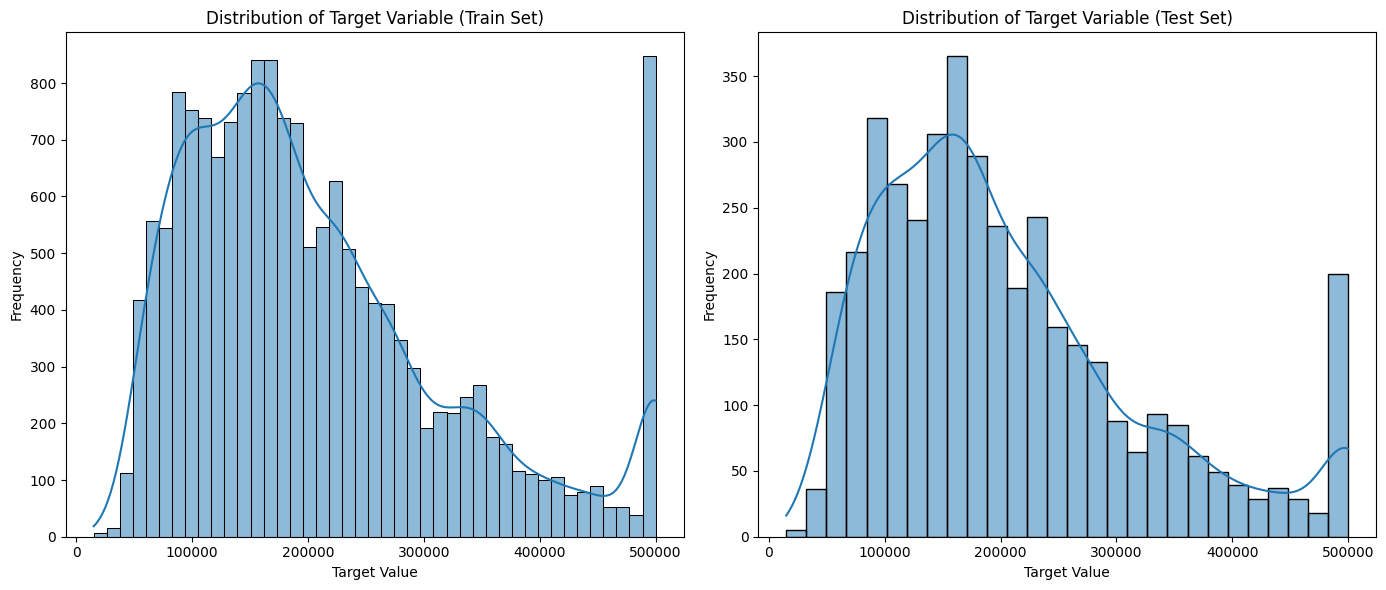

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(y_train, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Target Variable (Train Set)')
axes[0].set_xlabel('Target Value')
axes[0].set_ylabel('Frequency')

sns.histplot(y_test, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Target Variable (Test Set)')
axes[1].set_xlabel('Target Value')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Concatenate Training Features and Target (EDA Only)
This cell concatenates `X_train` and `y_train` **only for exploratory data analysis (EDA)**.
This combined DataFrame is **not used for model training or feature engineering fitting**,
preventing any form of data leakage.


In [16]:
df_train_test = pd.concat([X_train,y_train],axis = 1)

### Histograms of All Features in Training Set
This cell generates histograms for all features in the `df_train_test` DataFrame. This provides a visual overview of the distribution of each variable in the training data, helping to identify skewness, outliers, and potential transformations needed.

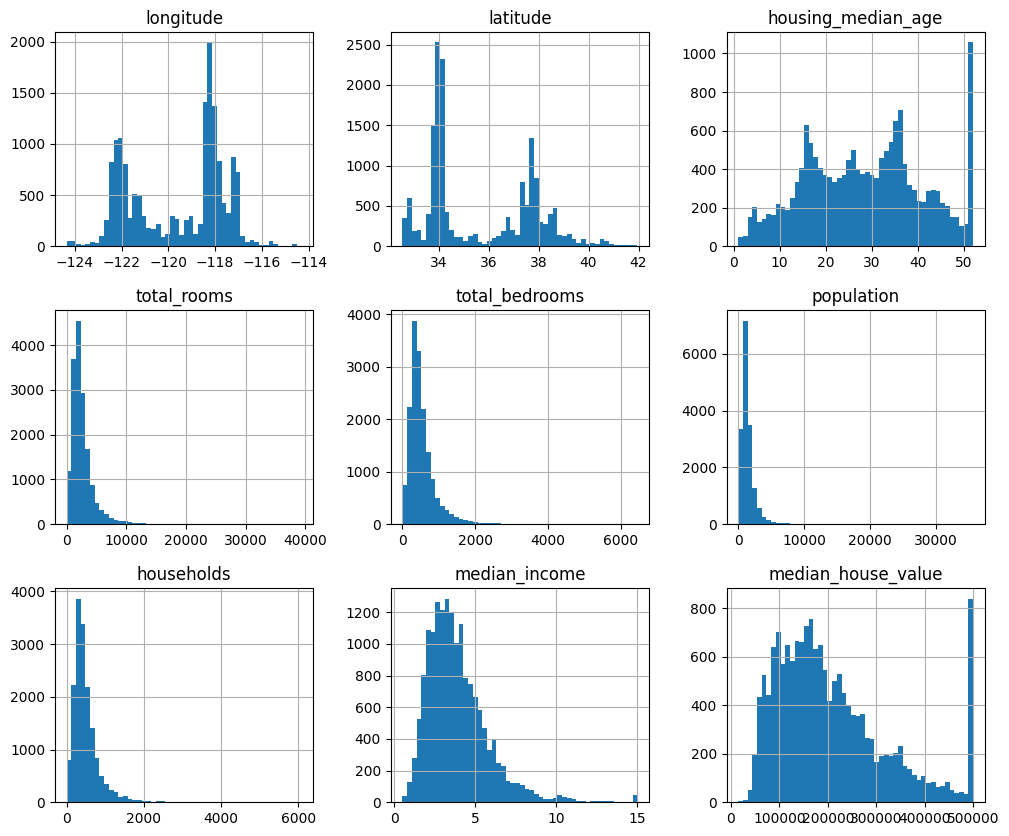

In [17]:
df_train_test.hist(figsize = (12,10),bins = 50)
plt.show()

### Scatter Matrix Plot of Selected Numerical Attributes
This cell creates a scatter matrix for selected numerical features from the training data.
The plot helps visualize pairwise relationships, distributions, and potential non-linear patterns
among key housing attributes.


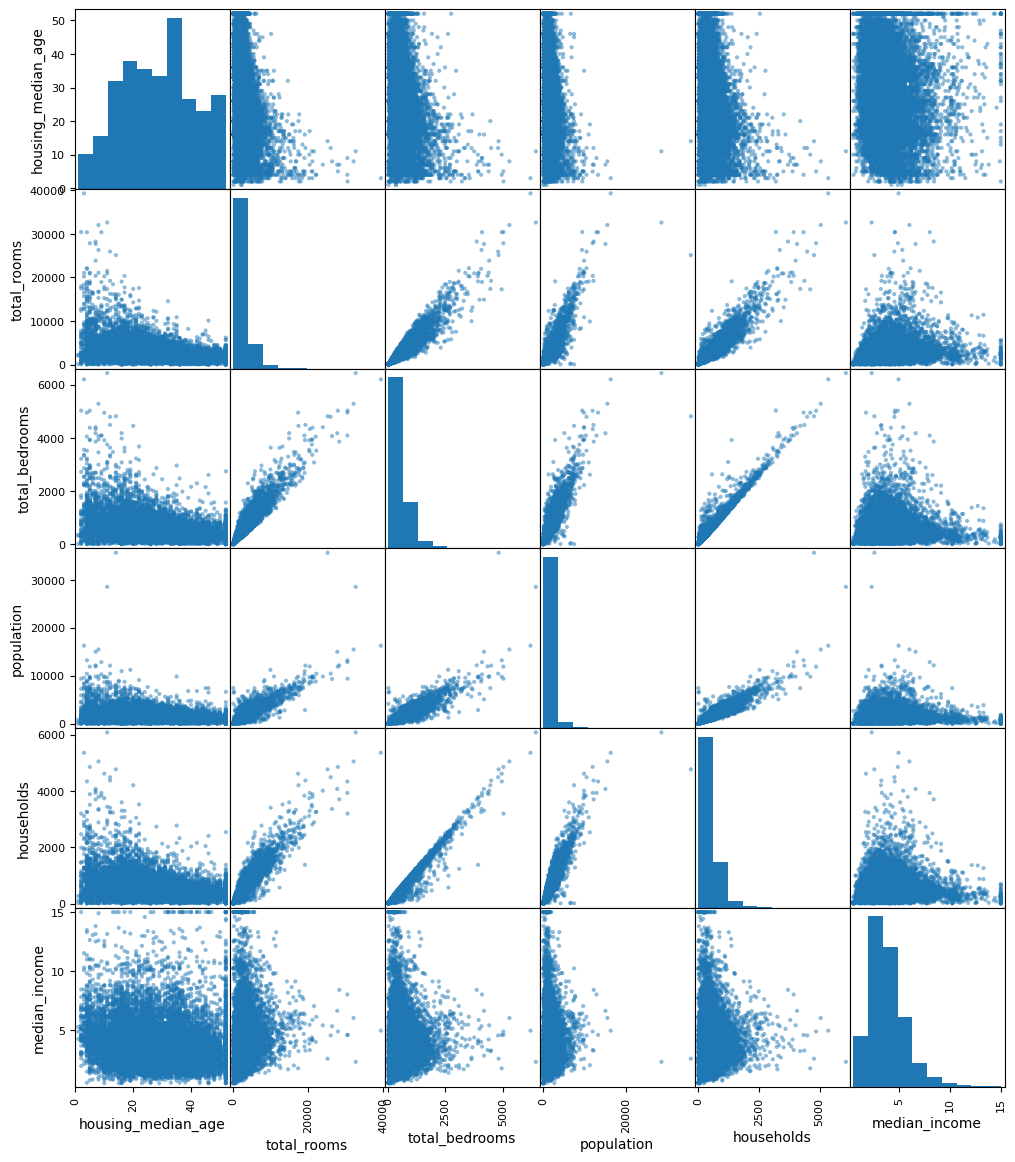

In [18]:
from pandas.plotting import scatter_matrix
attributes = ['housing_median_age',
              'total_rooms',
              'total_bedrooms',
              'population',
              'households',
              'median_income']
scatter_matrix(df_train_test[attributes],figsize = (12,14))
plt.show()

### Feature Engineering Class Definition
This cell defines a custom `FeatureEngineer` transformer that follows **scikit-learn's fit/transform API**.
All feature engineering steps are **fitted only on training data** and later applied to validation/test data,
ensuring no data leakage.

The transformer performs:
- **Missing value imputation** using KNNImputer for `total_bedrooms`
- **Feature creation**, including:
  - Income categories (`income_cat`)
  - Bedrooms per household
  - Log-transformed versions of skewed numerical features
- **One-hot encoding** of the `ocean_proximity` categorical feature
- **Removal of raw columns** once their engineered counterparts are created


In [19]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        self.feature_names_out = None
        self.imputer = KNNImputer(n_neighbors=5) # Initialize KNNImputer

    def fit(self, X, y=None):
        # Fit the OneHotEncoder on the 'ocean_proximity' column
        self.encoder.fit(X[['ocean_proximity']])
        original_feature_names_out = self.encoder.get_feature_names_out(['ocean_proximity'])
        # Sanitize feature names for XGBoost compatibility
        cleaned_feature_names = [
            name.replace('<', '').replace('>', '').replace(' ', '_').replace('-', '_')
            for name in original_feature_names_out
        ]
        self.feature_names_out = cleaned_feature_names

        # Fit the KNNImputer on the 'total_bedrooms' column
        self.imputer.fit(X[['total_bedrooms']])
        return self

    def transform(self, X):
        X = X.copy()

        # Impute missing values in 'total_bedrooms' first
        X['total_bedrooms'] = self.imputer.transform(X[['total_bedrooms']])

        # Income category
        X['income_cat'] = pd.cut(
            X['median_income'],
            bins=[0,1.5,3,4.5,6,np.inf],
            labels=[1,2,3,4,5]
        ).astype(int)

        # Engineered features
        X['bedrooms_per_house'] = X['total_bedrooms'] / X['total_rooms']
        X['Log_population'] = np.log1p(X['population'])
        X['Log_total_rooms'] = np.log1p(X['total_rooms'])
        X['Log_total_bedrooms'] = np.log1p(X['total_bedrooms'])

        # One-hot encode 'ocean_proximity' using sklearn's OneHotEncoder
        ocean_proximity_encoded = self.encoder.transform(X[['ocean_proximity']])
        ocean_proximity_df = pd.DataFrame(ocean_proximity_encoded, columns=self.feature_names_out, index=X.index)

        # Drop the original 'ocean_proximity' column and concatenate the new encoded columns
        X = X.drop('ocean_proximity', axis=1)
        X = pd.concat([X, ocean_proximity_df], axis=1)

        # Drop raw columns
        X.drop(['total_rooms','total_bedrooms','population'], axis=1, inplace=True)

        return X

### Instantiate Feature Engineer
This cell initializes the `feature_engineer` object, which is an instance of our custom `FeatureEngineer` class. This object will encapsulate all the defined feature engineering steps, allowing for consistent application of transformations to the dataset.

In [20]:
feature_engineer = FeatureEngineer()

### Apply Feature Engineering to Training Data
This cell **fits and applies** the feature engineering pipeline on the training data (`X_train`).
All transformation parameters (imputation, encoding, feature creation) are learned exclusively
from the training set.


In [21]:
X_train_featured = feature_engineer.fit_transform(X_train)

### Create Featured Training Data for Analysis
This cell constructs a feature-engineered version of the training data **without refitting**
the feature engineering pipeline.  
The engineered features are concatenated with the target variable purely for
correlation analysis and visualization purposes.


In [22]:
df_train_test_featured = pd.concat(
    [X_train_featured, y_train.reset_index(drop=True)],
    axis=1
)

### Visualize Income Category Distribution
This cell generates a bar plot to visualize the distribution of the `IncomeCat` feature in the `X_train_featured` DataFrame, showing the counts for each income category.

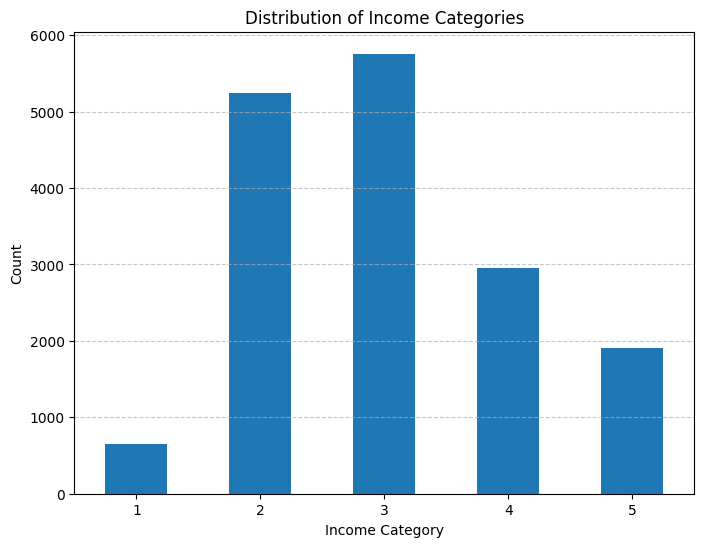

In [23]:
income_cat_counts = X_train_featured['income_cat'].value_counts().sort_index()
income_cat_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Distribution of Income Categories')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Visualize District Locations (Longitude vs Latitude)
This cell creates a scatter plot of `Longitude` against `Latitude` from `df_train_test`, visualizing the geographical distribution of the housing districts in California.

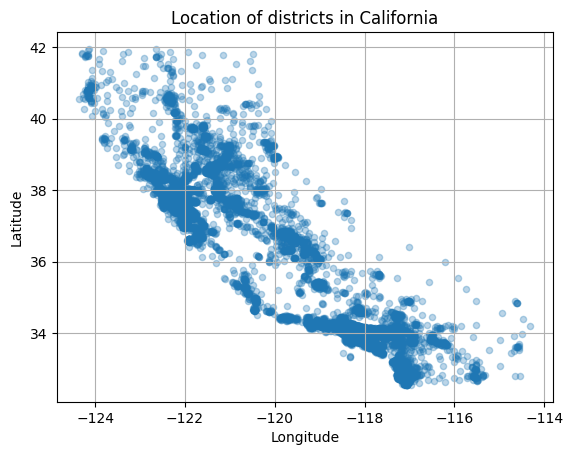

In [24]:
df_train_test.plot(kind = 'scatter',x = 'longitude',y = 'latitude',grid = True,alpha = 0.3)
plt.title('Location of districts in California')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Visualize Median House Value and Population by Location
This cell generates a scatter plot mapping `Longitude` and `Latitude`, where the size of the markers represents `Population` and the color indicates `MedHouseVal`. This helps to visualize the spatial distribution of house values and population density.

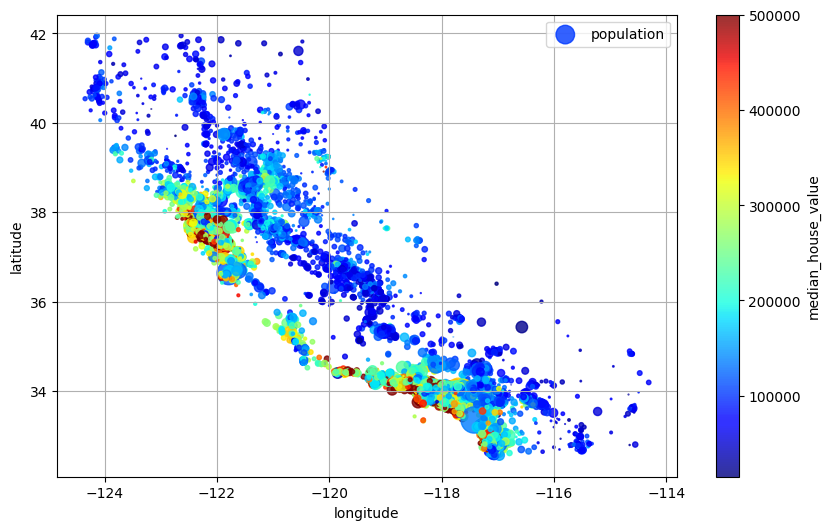

In [25]:
df_train_test.plot(kind = 'scatter',x = 'longitude',y = 'latitude',
             s= X_train['population']/100,label = 'population',
             c = 'median_house_value',cmap = 'jet',colorbar = True,
             sharex = False,figsize = (10,6),alpha = 0.8)
plt.grid(True)
plt.legend()
plt.show()

### Correlation Matrix Heatmap
This cell visualizes the Pearson correlation matrix of the engineered training features.
It provides insight into linear relationships and multicollinearity among engineered variables,
but does not imply causal relationships.


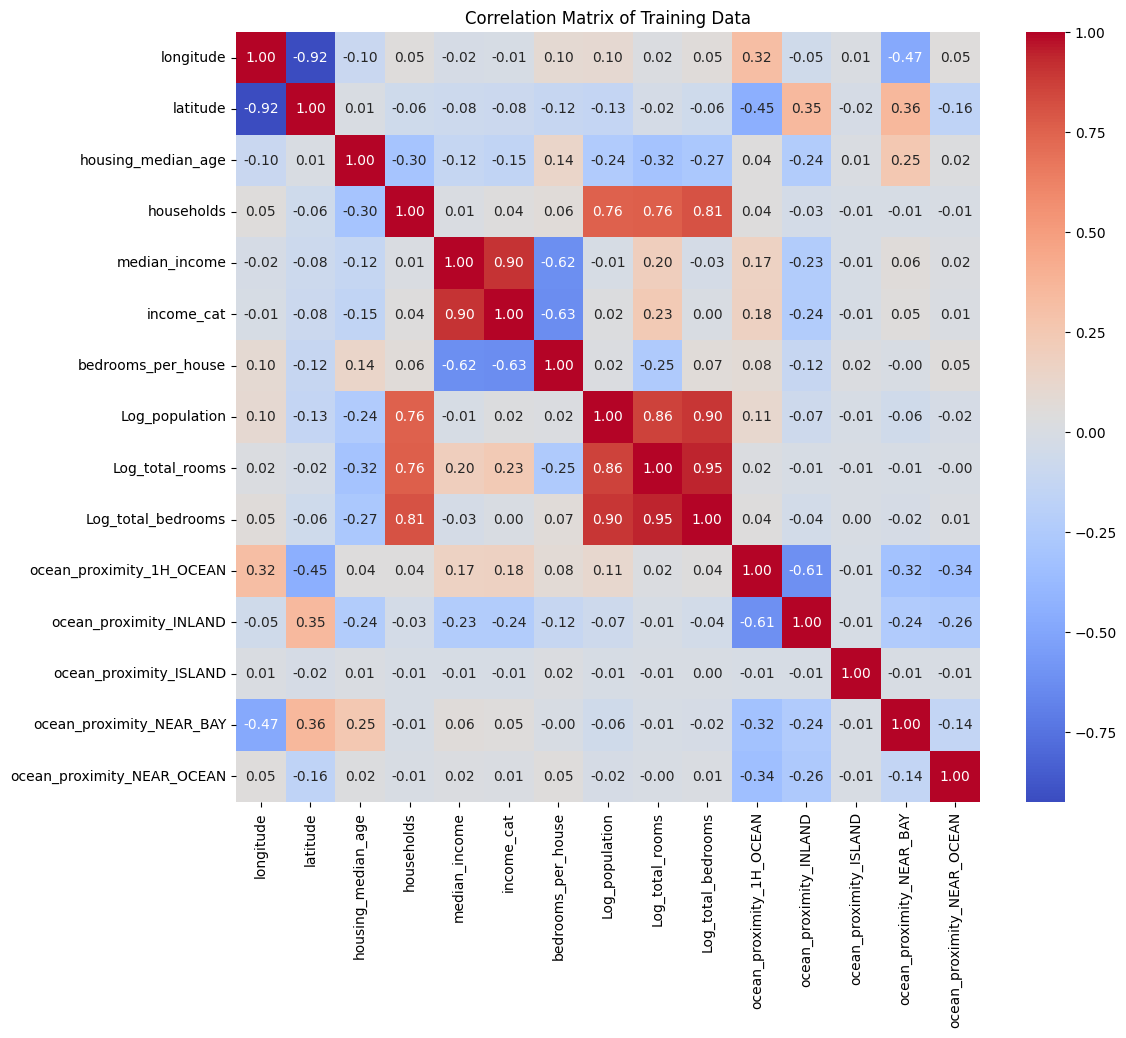

In [26]:
corr_matrix = X_train_featured.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Training Data')
plt.show()

### Correlation of Features with Target (Training Data Only)
This cell computes the correlation between engineered features and the target variable
using **training data only**.  
The results help identify features that exhibit strong linear association with
median house value.


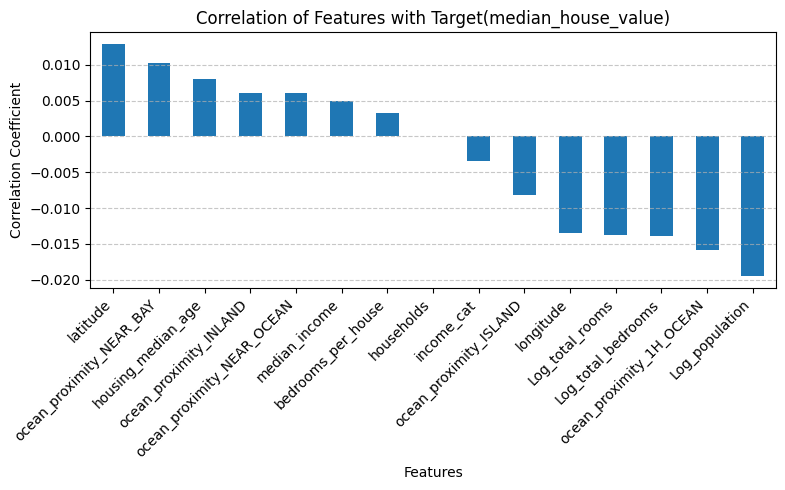

In [27]:
corr_matrix_with_target = df_train_test_featured.corr()
correlations_with_target = corr_matrix_with_target['median_house_value'].sort_values(ascending=False)
plt.figure(figsize=(8, 5))
correlations_with_target.drop('median_house_value').plot(kind='bar')
plt.title('Correlation of Features with Target(median_house_value)')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [28]:
corr_matrix = df_train_test_featured.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

,median_house_value
median_house_value,1.000000
latitude,0.012935
ocean_proximity_NEAR_BAY,0.010332
housing_median_age,0.008011
ocean_proximity_INLAND,0.006112
ocean_proximity_NEAR_OCEAN,0.006024
median_income,0.004999
bedrooms_per_house,0.003331
households,0.000077
income_cat,-0.003474


### Distribution Comparison: Population vs LogPopulation
This cell displays two histograms side-by-side, comparing the original `Population` distribution from `df_train_test` with its log-transformed version, `LogPopulation`, from `df_train_test_featured`. This illustrates the effect of log transformation on the data distribution.

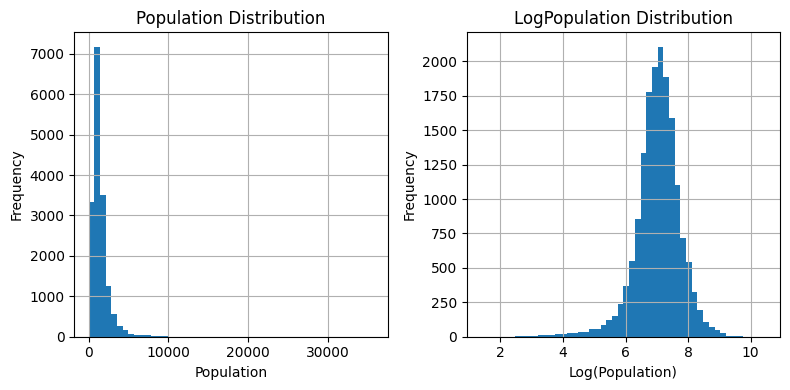

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

df_train_test['population'].hist(ax=axes[0], bins=50)
axes[0].set_title('Population Distribution')
axes[0].set_xlabel('Population')
axes[0].set_ylabel('Frequency')

df_train_test_featured['Log_population'].hist(ax=axes[1], bins=50)
axes[1].set_title('LogPopulation Distribution')
axes[1].set_xlabel('Log(Population)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Distribution Comparison: AveRooms vs LogAveRooms
This cell displays two histograms side-by-side, comparing the original `AveRooms` distribution from `df_train_test` with its log-transformed version, `LogAveRooms`, from `df_train_test_featured`. This visualizes how the log transformation affects the distribution of average rooms.

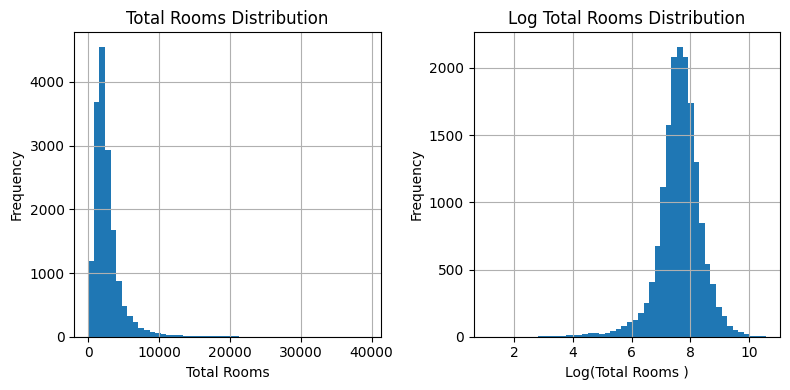

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))

df_train_test['total_rooms'].hist(ax=axes[0], bins=50)
axes[0].set_title('Total Rooms Distribution')
axes[0].set_xlabel('Total Rooms')
axes[0].set_ylabel('Frequency')

df_train_test_featured['Log_total_rooms'].hist(ax=axes[1], bins=50)
axes[1].set_title('Log Total Rooms Distribution')
axes[1].set_xlabel('Log(Total Rooms )')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Distribution Comparison: AveBedrms vs LogAveBedrms
This cell displays two histograms side-by-side, comparing the original `AveBedrms` distribution from `df_train_test` with its log-transformed version, `LogAveBedrms`, from `df_train_test_featured`. This shows the impact of log transformation on the distribution of average bedrooms.

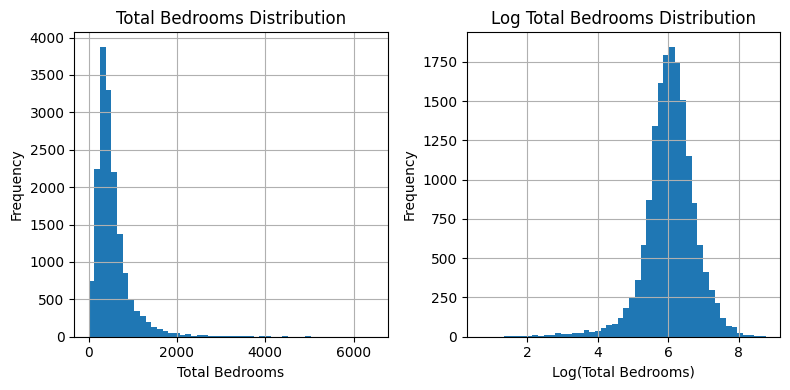

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))

df_train_test['total_bedrooms'].hist(ax=axes[0], bins=50)
axes[0].set_title('Total Bedrooms Distribution')
axes[0].set_xlabel('Total Bedrooms')
axes[0].set_ylabel('Frequency')

df_train_test_featured['Log_total_bedrooms'].hist(ax=axes[1], bins=50)
axes[1].set_title('Log Total Bedrooms Distribution')
axes[1].set_xlabel('Log(Total Bedrooms)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [32]:
X_train_featured

,longitude,latitude,housing_median_age,households,median_income,income_cat,bedrooms_per_house,Log_population,Log_total_rooms,Log_total_bedrooms,ocean_proximity_1H_OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR_BAY,ocean_proximity_NEAR_OCEAN
14196,-117.03,32.71,33,623,3.2596,3,0.200576,7.741099,8.047829,6.442540,0.0,0.0,0.0,0.0,1.0
8267,-118.16,33.77,49,756,3.8125,3,0.232703,7.181592,8.126518,6.669498,0.0,0.0,0.0,0.0,1.0
17445,-120.48,34.66,4,336,4.1563,3,0.174486,6.820016,7.548556,5.805135,0.0,0.0,0.0,0.0,1.0
14265,-117.11,32.69,36,355,1.9425,2,0.258269,7.257708,7.259820,5.908083,0.0,0.0,0.0,0.0,1.0
2271,-119.80,36.78,43,380,3.5542,3,0.180940,6.774224,7.776115,6.068426,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35,217,6.3700,5,0.151128,6.490724,7.193686,5.308268,1.0,0.0,0.0,0.0,0.0
11964,-117.43,34.02,33,449,3.0500,3,0.184825,7.469654,8.034307,6.347389,0.0,1.0,0.0,0.0,0.0
5390,-118.38,34.03,36,527,2.9344,2,0.270823,7.471363,7.650645,6.345636,1.0,0.0,0.0,0.0,0.0
860,-121.96,37.58,15,559,5.7192,4,0.166993,7.483244,8.182000,6.393591,1.0,0.0,0.0,0.0,0.0


### Apply Feature Engineering to Test Data
This cell applies the `FeatureEngineer` transformation to the `X_test` DataFrame, creating the same new engineered features and dropping specified original columns as done for the training data. The result is stored in `X_test_featured`.

In [33]:
X_test_featured = feature_engineer.transform(X_test)

In [34]:
X_test_featured

,longitude,latitude,housing_median_age,households,median_income,income_cat,bedrooms_per_house,Log_population,Log_total_rooms,Log_total_bedrooms,ocean_proximity_1H_OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR_BAY,ocean_proximity_NEAR_OCEAN
20046,-119.01,36.06,25,359,1.6812,2,0.357805,7.239215,7.317212,6.290637,0.0,1.0,0.0,0.0,0.0
3024,-119.46,35.14,30,584,2.5313,2,0.182975,7.356280,7.987524,6.290637,0.0,1.0,0.0,0.0,0.0
15663,-122.44,37.80,52,963,3.4801,3,0.140600,7.178545,8.250881,6.290637,0.0,0.0,0.0,1.0,0.0
20484,-118.72,34.28,17,495,5.7376,4,0.176498,7.441907,8.023552,6.290637,1.0,0.0,0.0,0.0,0.0
9814,-121.93,36.62,34,428,3.7250,3,0.229050,6.969791,7.763021,6.290637,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16,452,4.6050,4,0.152291,7.209340,8.060224,6.180017,1.0,0.0,0.0,0.0,0.0
16623,-120.83,35.36,28,705,2.7266,2,0.204950,7.409136,8.371936,6.787845,0.0,0.0,0.0,0.0,1.0
18086,-122.05,37.31,25,568,9.2298,5,0.130868,7.368970,8.321665,6.289716,1.0,0.0,0.0,0.0,0.0
2144,-119.76,36.77,36,474,2.7850,2,0.185880,7.113142,7.827241,6.146329,0.0,1.0,0.0,0.0,0.0


### Model Definition and Training (XGBoost Regressor)
This cell initializes and trains an **XGBoost Regressor**, a powerful gradient-boosted
tree-based model well suited for structured/tabular data.
The model is trained using the engineered training features.


In [35]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(random_state = 42)
xgb_reg.fit(X_train_featured,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

### Cross-Validation Score Calculation
This cell performs 5-fold cross-validation on the trained XGBoost Regressor model using `neg_root_mean_squared_error` as the scoring metric. This provides a more robust estimate of the model's performance.

In [36]:
from sklearn.model_selection import cross_val_score
xgb_cvs = cross_val_score(xgb_reg,X_train_featured,y_train,cv = 5,scoring = 'neg_root_mean_squared_error')
xgb_cvs

array([-49058.0390625 , -47416.11328125, -47546.2421875 , -47647.625     ,
       -48304.41796875])

### Display Cross-Validation Mean and Standard Deviation
This cell calculates and displays the mean and standard deviation of the cross-validation scores, providing a summary of the model's performance across different folds.

In [37]:
f'{xgb_cvs.mean()} ± {xgb_cvs.std()}'

'-47994.4875 ± 613.669782954144'

### Predict on Test Data
This cell uses the trained XGBoost Regressor model (`xgb_reg`) to make predictions on the `X_test_featured` dataset. The predictions are stored in `xgb_predicted`.

In [38]:
xgb_predicted = xgb_reg.predict(X_test_featured)
xgb_predicted

array([ 38828.15,  77470.28, 485500.75, ..., 503353.12,  86017.43,
       196203.69], dtype=float32)

### Calculate Root Mean Squared Error (RMSE)
This cell calculates the Root Mean Squared Error (RMSE) between the actual target values (`y_test`) and the predicted values (`xgb_predicted`) on the test set. RMSE is a common metric to measure the average magnitude of the errors.

In [39]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test,xgb_predicted)

48645.4140625

### Calculate Mean Absolute Error (MAE)
This cell calculates the Mean Absolute Error (MAE) between the actual target values (`y_test`) and the predicted values (`xgb_predicted`) on the test set. MAE measures the average magnitude of the errors without considering their direction.

In [40]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,xgb_predicted)

32001.611328125

### Calculate R-squared (R2) Score
This cell calculates the R-squared (R2) score between the actual target values (`y_test`) and the predicted values (`xgb_predicted`) on the test set. R2 represents the proportion of the variance in the dependent variable that is predictable from the independent variables.

In [41]:
from sklearn.metrics import r2_score
r2_score(y_test,xgb_predicted)

0.8194169402122498

### Hyperparameter Tuning with GridSearchCV (XGBoost)
This cell performs an exhaustive grid search to find the optimal hyperparameters for the XGBoost Regressor. It defines a parameter grid with various combinations of `n_estimators`, `max_depth`, `learning_rate`, `subsample`, and `colsample_bytree`. Cross-validation (`cv=5`) is used to evaluate each combination, with `neg_root_mean_squared_error` as the scoring metric. The best parameters and corresponding RMSE are then printed.

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid_xgb = {
    'n_estimators': [800,1000],
    'max_depth': [4,5,6],
    'learning_rate': [0.1],
    'subsample': [ 0.6,0.9],
    'colsample_bytree': [0.6,0.9]
}

xgb_reg = XGBRegressor(random_state=42)

grid_search_xgb = GridSearchCV(xgb_reg, param_grid_xgb, cv=5,
                               scoring='neg_root_mean_squared_error',
                               return_train_score=True, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train_featured, y_train)

print("Best parameters for XGBoost: ", grid_search_xgb.best_params_)
print("Best RMSE for XGBoost: ", -grid_search_xgb.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for XGBoost:  {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 800, 'subsample': 0.9}
Best RMSE for XGBoost:  45797.76328125


### Retrieve Best Estimator
This cell retrieves the best performing XGBoost Regressor model found during the `GridSearchCV`. This optimized model (`xgb_best_reg`) will be used for further evaluation and predictions.

In [43]:
xgb_best_reg = grid_search_xgb.best_estimator_

In [44]:
xgb_best_cvs = cross_val_score(xgb_best_reg,X_train_featured,y_train,cv = 5,scoring = 'neg_root_mean_squared_error')
xgb_best_cvs

array([-46471.640625  , -45646.96484375, -45325.6484375 , -45545.90234375,
       -45998.66015625])

In [45]:
f'{xgb_best_cvs.mean()} ± {xgb_best_cvs.std()}'

'-45797.76328125 ± 400.8832136880337'

### Learning Curve Calculation
This cell calculates the learning curve for the XGBoost Regressor. It evaluates the model's performance on both training and cross-validation sets for varying sizes of the training data, helping to diagnose bias and variance.

In [46]:
from sklearn.model_selection import learning_curve

train_sizes = np.linspace(0.1, 1.0, 10)

train_sizes, train_scores, test_scores = learning_curve(
    xgb_best_reg, X_train_featured, y_train,
    cv=5, scoring='neg_root_mean_squared_error', train_sizes=train_sizes
)

### Plot Learning Curve
This cell plots the learning curve generated in the previous step. It visualizes the training score and cross-validation score against the training set size, along with their standard deviations, to assess model performance and identify potential overfitting or underfitting.

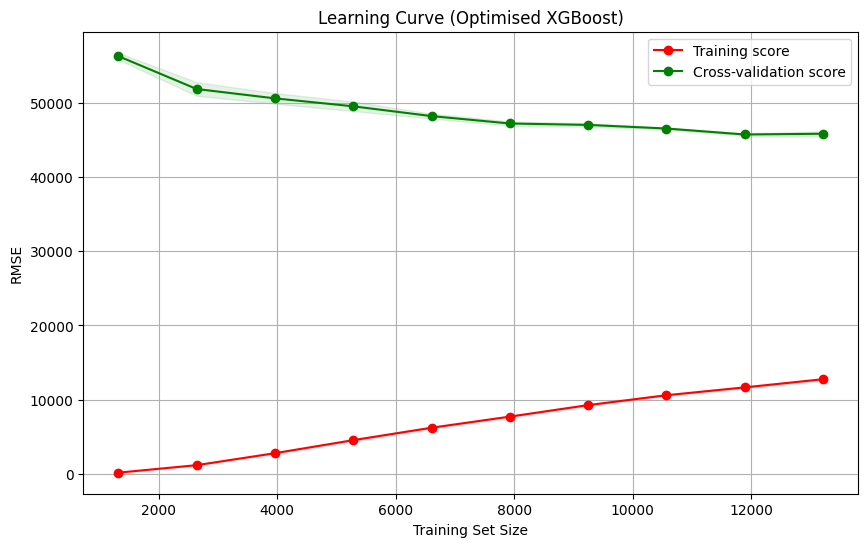

In [47]:
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")

plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.title('Learning Curve (Optimised XGBoost)')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend(loc="best")
plt.show()

In [48]:
xgb_best_predicted = xgb_best_reg.predict(X_test_featured)
xgb_best_predicted

array([ 43821.168,  83861.96 , 608174.6  , ..., 473277.4  ,  70139.88 ,
       174323.5  ], dtype=float32)

In [49]:
root_mean_squared_error(y_test,xgb_best_predicted)

45687.421875

In [50]:
mean_absolute_error(y_test,xgb_best_predicted)

29585.1015625

In [51]:
r2_score(y_test,xgb_best_predicted)

0.8407107591629028

### Calculate Confidence Interval for RMSE
This cell calculates a confidence interval for the Root Mean Squared Error (RMSE) of the model's predictions. It first computes the squared differences between the actual (`y_test`) and predicted (`xgb_best_predicted`) target values. Then, using `scipy.stats.t.interval`, it determines a `confidence` (e.g., 95%) interval around the mean of these squared errors. This provides a statistical range, using a t-distribution, to estimate the variability of the model's error.
## Note:
 This confidence interval is an approximate statistical estimate based on
the distribution of squared errors and should be interpreted accordingly.


In [52]:
from scipy import stats
confidence = 0.95
squared_errors = (y_test - xgb_best_predicted) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=np.mean(squared_errors),scale = stats.sem(squared_errors)))

array([43548.51779371, 47730.57850051])

### Plot Actual vs. Predicted Values
This cell generates a scatter plot comparing the actual target values (`y_test`) against the model's predicted values (`xgb_best_predicted`). A diagonal line representing perfect prediction is also included for reference, helping to visualize model accuracy.

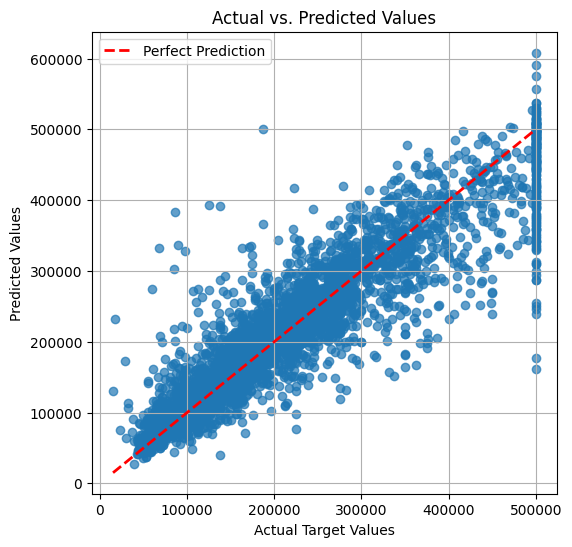

In [53]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, xgb_best_predicted, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction') # Added explicit label
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.legend()
plt.show()

### Plot Residuals vs. Predicted Values
This cell generates a scatter plot of the residuals (difference between actual and predicted values) against the predicted values. This plot helps to diagnose heteroscedasticity and other patterns in the errors, indicating potential model biases.

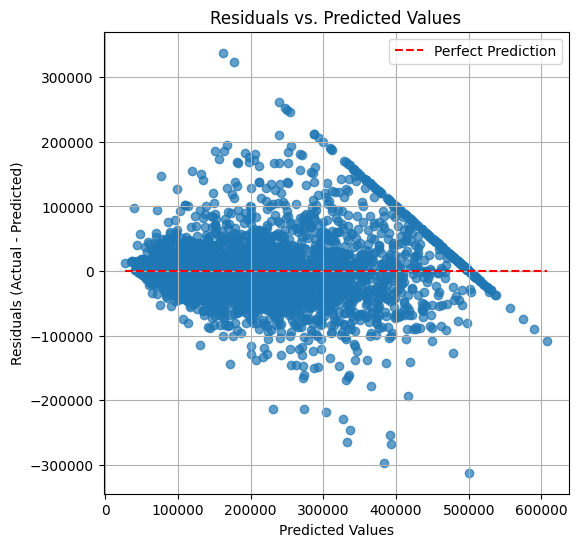

In [54]:
residuals = y_test - xgb_best_predicted

plt.figure(figsize=(6, 6))
plt.scatter(xgb_best_predicted, residuals, alpha=0.7)
plt.hlines(y=0, xmin=xgb_best_predicted.min(), xmax=xgb_best_predicted.max(), colors='red', linestyles='--', label='Perfect Prediction')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs. Predicted Values')
plt.grid(True)
plt.legend()
plt.show()

In [55]:
feature_importances = xgb_best_reg.feature_importances_
features = X_train_featured.columns
importances_df = pd.Series(feature_importances, index=features).sort_values(ascending=False)

### Plot Feature Importances
This cell visualizes feature importances derived from the **optimized XGBoost Regressor**.
These importances are based on the model’s internal split criteria and provide a high-level
view of influential features.


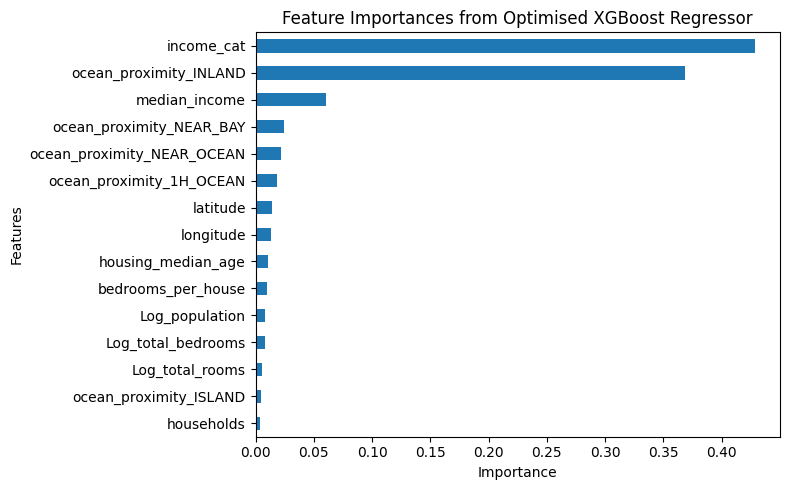

In [56]:
plt.figure(figsize=(8,5))
importances_df.sort_values().plot.barh()
plt.title('Feature Importances from Optimised XGBoost Regressor')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

### Calculate Permutation Importances
This cell calculates permutation importances for the XGBoost Regressor. Unlike impurity-based feature importances, permutation importance measures the decrease in a model's score when a single feature is randomly shuffled, providing a more reliable estimate of feature contribution.

In [57]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(xgb_best_reg, X_test_featured, y_test, n_repeats=10, random_state=42)

### Display Permutation Importances
This cell extracts and displays the mean permutation importances, sorted in descending order. This provides a numerical ranking of features based on their impact on model performance when shuffled.

In [58]:
perm_importance_mean = perm_importance.importances_mean
perm_importances_df = pd.Series(perm_importance_mean, index=X_test_featured.columns).sort_values(ascending=False)
perm_importances_df

,0
longitude,1.454050
latitude,1.394966
median_income,0.223381
Log_population,0.150269
bedrooms_per_house,0.095821
ocean_proximity_INLAND,0.091696
households,0.072288
Log_total_rooms,0.070568
Log_total_bedrooms,0.044380
housing_median_age,0.040243


### Plot Permutation Importances
This cell generates a bar plot of the permutation importances. This visual representation helps to understand the relative importance of each feature in the XGBoost model's predictions.

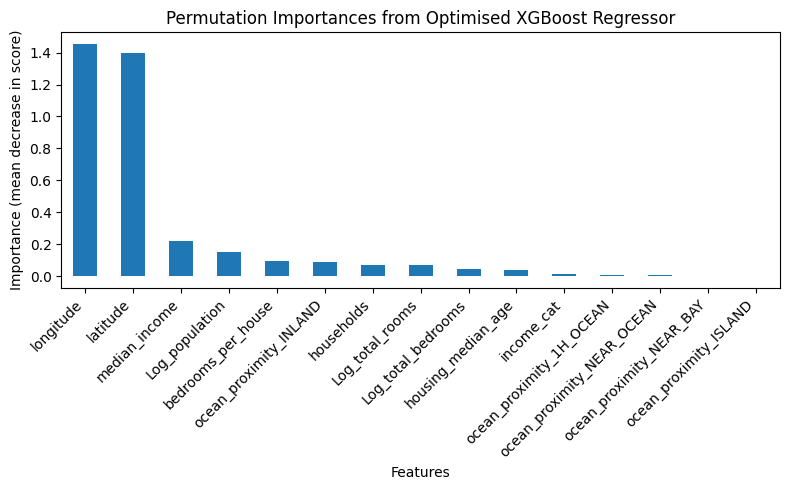

In [59]:
plt.figure(figsize=(8, 5))
perm_importances_df.plot.bar()
plt.title('Permutation Importances from Optimised XGBoost Regressor')
plt.xlabel('Features')
plt.ylabel('Importance (mean decrease in score)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Prepare Data for Map Visualization
This cell creates a new DataFrame `df_map` containing the `Latitude` and `Longitude` from the test set, along with the actual and predicted median house values. This DataFrame is used for geographical visualization of results.

In [60]:
df_map = X_test[['latitude', 'longitude']].copy()
df_map['Actual_median_house_value'] = y_test
df_map['Predicted_median_house_value'] = xgb_best_predicted
df_map.head()

,latitude,longitude,Actual_median_house_value,Predicted_median_house_value
20046,36.06,-119.01,47700,43821.167969
3024,35.14,-119.46,45800,83861.960938
15663,37.80,-122.44,500001,608174.625000
20484,34.28,-118.72,218600,254687.265625
9814,36.62,-121.93,278000,269570.781250


### Visualize Actual vs. Predicted Median House Value on Map
This cell generates two scatter plots side-by-side, visualizing the geographical distribution of actual and predicted median house values on a map. The size and color of the markers represent the house values, allowing for a visual comparison of model performance across locations.

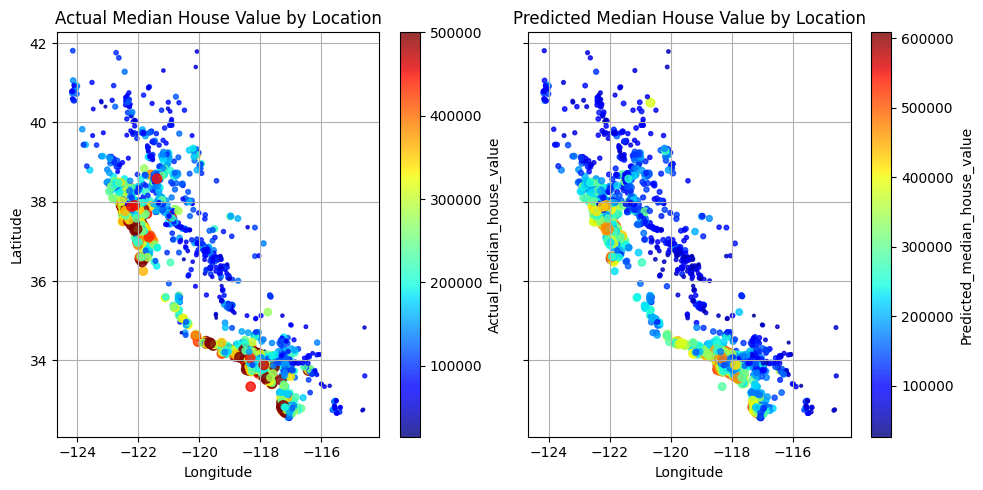

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Plot for Actual Median House Value
df_map.plot(kind='scatter', x='longitude', y='latitude',
             c='Actual_median_house_value', cmap='jet', colorbar=True,
             s=df_map['Actual_median_house_value']/10000, alpha=0.8, ax=axes[0])
axes[0].set_title('Actual Median House Value by Location')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].grid(True)

# Plot for Predicted Median House Value
df_map.plot(kind='scatter', x='longitude', y='latitude',
             c='Predicted_median_house_value', cmap='jet', colorbar=True,
             s=df_map['Predicted_median_house_value']/10000, alpha=0.8, ax=axes[1])
axes[1].set_title('Predicted Median House Value by Location')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Save Trained Model
This cell serializes the trained XGBoost regression model using `joblib`.
Saving the model enables reuse for inference or deployment without retraining.
'California_house_prediction_xgboost_reg.pkl'. This allows for later reuse of the trained model without retraining.

In [62]:
import joblib
joblib.dump(xgb_best_reg,'California_house_prediction_xgboost_reg.pkl')
print("Optimised XGBoost Regressor model dumped successfully!")

Optimised XGBoost Regressor model dumped successfully!
